## Install the package dependencies before running this notebook

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import os, os.path 
import numpy 
import pickle
from glob import glob

"""
    number of trajectories in each city
    # austin --  train: 43041 test: 6325 
    # miami -- train: 55029 test:7971
    # pittsburgh -- train: 43544 test: 6361
    # dearborn -- train: 24465 test: 3671
    # washington-dc -- train: 25744 test: 3829
    # palo-alto -- train:  11993 test:1686

    trajectories sampled at 10HZ rate, input 5 seconds, output 6 seconds
    
"""

'\n    number of trajectories in each city\n    # austin --  train: 43041 test: 6325 \n    # miami -- train: 55029 test:7971\n    # pittsburgh -- train: 43544 test: 6361\n    # dearborn -- train: 24465 test: 3671\n    # washington-dc -- train: 25744 test: 3829\n    # palo-alto -- train:  11993 test:1686\n\n    trajectories sampled at 10HZ rate, input 5 seconds, output 6 seconds\n    \n'

## Create a Torch.Dataset class for the training dataset

In [2]:
from glob import glob
import pickle
import numpy as np

ROOT_PATH = ""

cities = ["austin", "miami", "pittsburgh", "dearborn", "washington-dc", "palo-alto"]
splits = ["train", "test"]

def get_city_trajectories(city="palo-alto", split="train", normalized=False):
    f_in = ROOT_PATH + split + "/" + city + "_inputs"
    inputs = pickle.load(open(f_in, "rb"))
    inputs = np.asarray(inputs)
    
    outputs = None
    
    if split=="train":
        f_out = ROOT_PATH + split + "/" + city + "_outputs"
        outputs = pickle.load(open(f_out, "rb"))
        outputs = np.asarray(outputs)

    return inputs, outputs

class ArgoverseDataset(Dataset):
    """Dataset class for Argoverse"""
    def __init__(self, city: str, split:str, transform=None):
        super(ArgoverseDataset, self).__init__()
        self.transform = transform

        self.inputs, self.outputs = get_city_trajectories(city=city, split=split, normalized=False)

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):

        data = (self.inputs[idx], self.outputs[idx])
            
        if self.transform:
            data = self.transform(data)

        return data

# intialize a dataset
count_train = 0
for i in cities:
    city = i  
    split = 'train'
    train_dataset  = ArgoverseDataset(city = city, split = split)
    count_train += len(train_dataset)
print("the number of training data:" + str(count_train))

count_test = 0
for i in cities:
    city = i  
    split = 'test'
    test_dataset  = ArgoverseDataset(city = city, split = split)
    count_test+= len(test_dataset)
print("the number of training data:" + str(count_test))

the number of training data:203816
the number of training data:29843


In [3]:
i,o = get_city_trajectories(city = cities[0])
for city in cities[1:]:
    a,b = get_city_trajectories(city = city)
    i = np.concatenate([i, a])
    o = np.concatenate([o, b])
for city in cities:
    a,b = get_city_trajectories(city = city, split = 'test')
    i = np.concatenate([i, a])

In [4]:
# if we use 1000 as interval
input_x =i[:,:,0].reshape(-1)
input_y = i[:,:,1].reshape(-1)
output_x = o[:,:,0].reshape(-1)
output_y = o[:,:,1].reshape(-1)

In [5]:
np.min(input_x)

-9222.61470641863

In [6]:
interval = 100

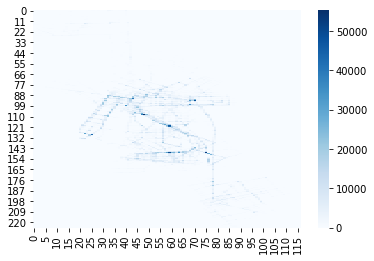

In [168]:
x_min = np.min(input_x)
y_min = np.min(input_y)
m = (np.max(input_x) - np.min(input_x))//interval
m= int(m+1)
n = (np.max(input_y) - np.min(input_y))//interval
n = int(n +1)
counter_map = np.zeros((m,n))
for _ in i:
    for p in _:
        temp_x = p[0]
        temp_y = p[1]
        temp_m = int((temp_x - x_min) // interval)
        temp_n = int((temp_y - y_min) // interval)
        counter_map[temp_m][temp_n] += 1
import numpy as np
import seaborn as sns
ax = sns.heatmap(counter_map, cmap = 'Blues')

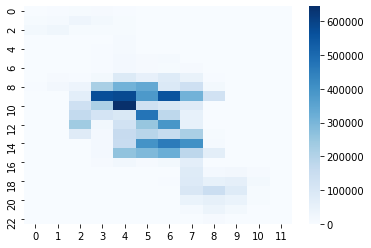

In [162]:
x_min = np.min(output_x)
y_min = np.min(output_y)
m = (np.max(output_x) - np.min(output_x))//interval
m= int(m+1)
n = (np.max(output_y) - np.min(output_y))//interval
n = int(n +1)
counter_map = np.zeros((m,n))
for _ in o:
    for p in _:
        temp_x = p[0]
        temp_y = p[1]
        temp_m = int((temp_x - x_min) // interval)
        temp_n = int((temp_y - y_min) // interval)
        counter_map[temp_m][temp_n] += 1
import numpy as np
import seaborn as sns
ax = sns.heatmap(counter_map, cmap = 'Blues')

In [153]:
def _heatmap_city(city, interval, ax, inp = True):
        i,o = get_city_trajectories(city = city)
        a,b = get_city_trajectories(city = city, split ='test')
        i = np.concatenate([i, a])
        
        input_x =i[:,:,0].reshape(-1)
        input_y = i[:,:,1].reshape(-1)
        output_x = o[:,:,0].reshape(-1)
        output_y = o[:,:,1].reshape(-1)
        if not inp:
            x_min = np.min(output_x)
            y_min = np.min(output_y)

            m = (np.max(output_x) - np.min(output_x))//interval
            m = int(m+1)
            n = (np.max(output_y) - np.min(output_y))//interval
            n = int(n +1)
            counter_map = np.zeros((m,n))
        
            for _ in i:
                for p in _:
                    temp_x = p[0]
                    temp_y = p[1]
                    temp_m = int((temp_x - x_min) // interval)
                    temp_n = int((temp_y - y_min) // interval)
                    counter_map[temp_m][temp_n] += 1
            ax = sns.heatmap(counter_map, cmap = 'Blues', ax = axes[ax,1])
            ax.set_title("output distribution at city {}".format(city))
        else:
            x_min = np.min(input_x)
            y_min = np.min(input_y)

            m = (np.max(input_x) - np.min(input_x))//interval
            m = int(m+1)
            n = (np.max(input_y) - np.min(input_y))//interval
            n = int(n +1)
            counter_map = np.zeros((m,n))
        
            for _ in i:
                for p in _:
                    temp_x = p[0]
                    temp_y = p[1]
                    temp_m = int((temp_x - x_min) // interval)
                    temp_n = int((temp_y - y_min) // interval)
                    counter_map[temp_m][temp_n] += 1
            ax = sns.heatmap(counter_map, cmap = 'Blues', ax = axes[ax,0])
            ax.set_title("input distribution at city {}".format(city))
            
    
    

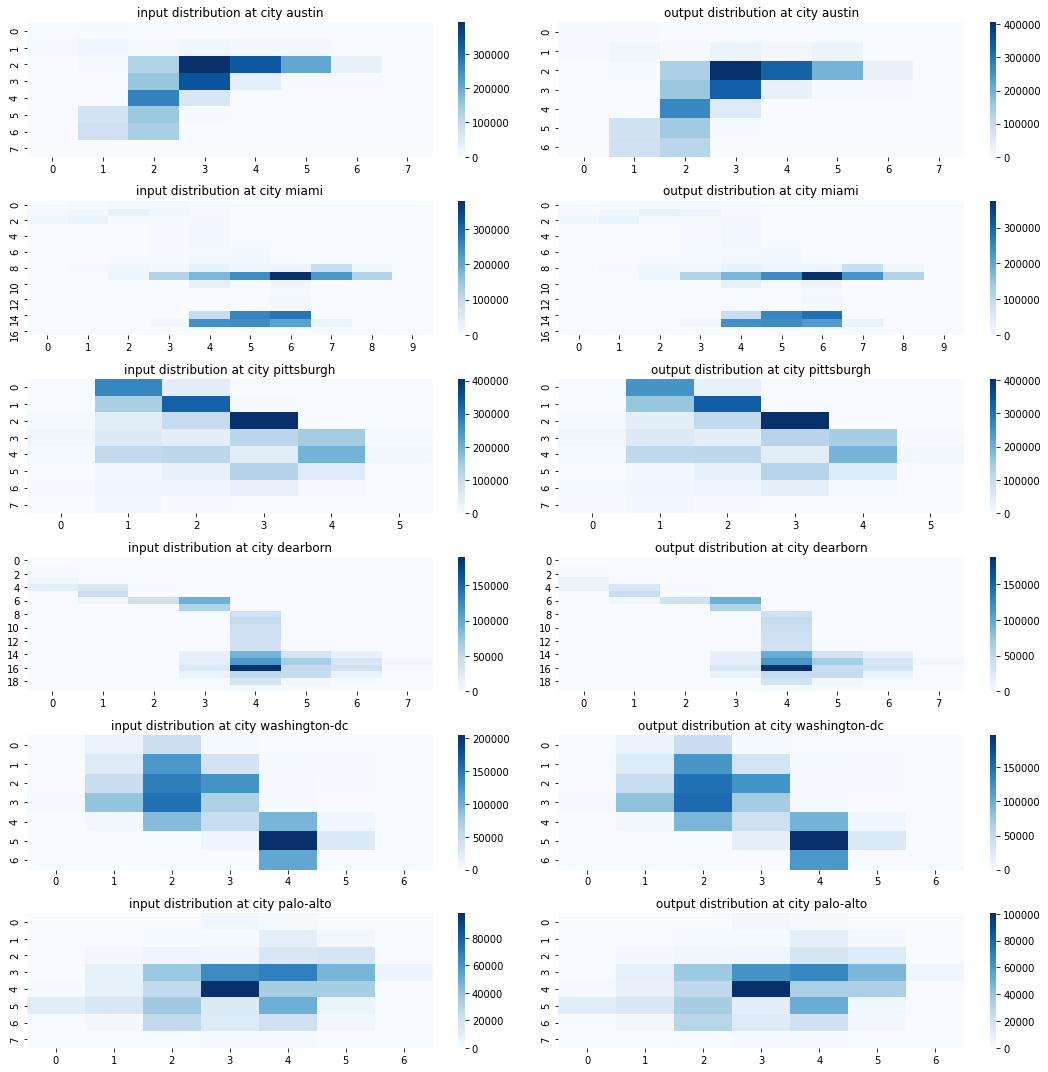

In [159]:
nrows = 12
n_cols = 2
fig, axes = plt.subplots(nrows=int(np.ceil(nrows/n_cols)), 
                         ncols=n_cols, 
                         figsize=(15,15))

for inx, city in enumerate (cities):
    _heatmap_city(city = city, interval = 1000, ax = inx)
for inx, city in enumerate (cities):
    _heatmap_city(city = city, interval = 1000, ax = inx, inp = False)
plt.tight_layout()
    
    

## Create a DataLoader class for training

In [5]:
batch_sz = 4  # batch size 
train_loader = DataLoader(train_dataset,batch_size=batch_sz)

## Sample a batch of data and visualize 

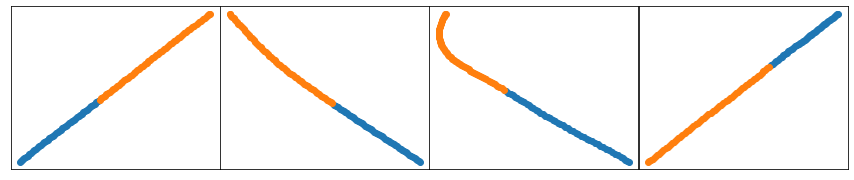

In [6]:
import matplotlib.pyplot as plt
import random


def show_sample_batch(sample_batch):
    """visualize the trajectory for a batch of samples"""
    inp, out = sample_batch
    batch_sz = inp.size(0)
    agent_sz = inp.size(1)
    
    fig, axs = plt.subplots(1,batch_sz, figsize=(15, 3), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .5, wspace=.001)
    axs = axs.ravel()   
    for i in range(batch_sz):
        axs[i].xaxis.set_ticks([])
        axs[i].yaxis.set_ticks([])
        
        # first two feature dimensions are (x,y) positions
        axs[i].scatter(inp[i,:,0], inp[i,:,1])
        axs[i].scatter(out[i,:,0], out[i,:,1])

        
for i_batch, sample_batch in enumerate(train_loader):
    inp, out = sample_batch
    """
    TODO:
      implement your Deep learning model
      implement training routine
    """
    show_sample_batch(sample_batch)
    break

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
p_i, p_o = get_city_trajectories(city="palo-alto", split="test", normalized=False)

In [56]:
p_i.shape

(1686, 50, 2)

In [57]:
def predict(inp):
    x_start = inp[0][0]
    x_final = inp[-1][0]
    y_start = inp[0][1]
    y_final = inp[-1][1]
    
    avg_vx = (x_final - x_start) / 50
    avg_vy = (y_final - y_start) / 50
    
    pred = [[x_final + avg_vx * i, y_final + avg_vy * i] for i in range(1, 61)]
    
    return pred


In [52]:
city = "palo-alto"

In [59]:
palo_alto_df = pd.DataFrame()
for i in range(len(p_i)):
    
    pred = predict(p_i[i])
    
    temp_dict = {}
    for j in range(0, 120, 2):
        col_x = 'v' + str(j)
        col_y = 'v' + str(j+1)
        row = j // 2
        temp_dict[col_x] = pred[row][0]
        temp_dict[col_y] = pred[row][1]
    
    temp_idx_name = str(i) + "_" + city
    temp_final = pd.DataFrame(temp_dict, index=[temp_idx_name])
    palo_alto_df = pd.concat([palo_alto_df, temp_final])

In [62]:
a_i, a_o = get_city_trajectories(city="austin", split="test", normalized=False)

In [63]:
city = "austin"

In [64]:
austin_df = pd.DataFrame()
for i in range(len(a_i)):
    
    pred = predict(a_i[i])
    
    temp_dict = {}
    for j in range(0, 120, 2):
        col_x = 'v' + str(j)
        col_y = 'v' + str(j+1)
        row = j // 2
        temp_dict[col_x] = pred[row][0]
        temp_dict[col_y] = pred[row][1]
    
    temp_idx_name = str(i) + "_" + city
    temp_final = pd.DataFrame(temp_dict, index=[temp_idx_name])
    austin_df = pd.concat([austin_df, temp_final])

In [70]:
m_i, m_o = get_city_trajectories(city="miami", split="test", normalized=False)

In [71]:
city = "miami"

In [72]:
miami_df = pd.DataFrame()
for i in range(len(m_i)):
    
    pred = predict(m_i[i])
    
    temp_dict = {}
    for j in range(0, 120, 2):
        col_x = 'v' + str(j)
        col_y = 'v' + str(j+1)
        row = j // 2
        temp_dict[col_x] = pred[row][0]
        temp_dict[col_y] = pred[row][1]
    
    temp_idx_name = str(i) + "_" + city
    temp_final = pd.DataFrame(temp_dict, index=[temp_idx_name])
    miami_df = pd.concat([miami_df, temp_final])

In [81]:
pi_i, pi_o = get_city_trajectories(city="pittsburgh", split="test", normalized=False)

In [82]:
city = "pittsburgh"

In [83]:
pittsburgh_df = pd.DataFrame()
for i in range(len(pi_i)):
    
    pred = predict(pi_i[i])
    
    temp_dict = {}
    for j in range(0, 120, 2):
        col_x = 'v' + str(j)
        col_y = 'v' + str(j+1)
        row = j // 2
        temp_dict[col_x] = pred[row][0]
        temp_dict[col_y] = pred[row][1]
    
    temp_idx_name = str(i) + "_" + city
    temp_final = pd.DataFrame(temp_dict, index=[temp_idx_name])
    pittsburgh_df = pd.concat([pittsburgh_df, temp_final])

In [90]:
d_i, d_o = get_city_trajectories(city="dearborn", split="test", normalized=False)

In [91]:
city = "dearborn"

In [92]:
dearborn_df = pd.DataFrame()
for i in range(len(d_i)):
    
    pred = predict(d_i[i])
    
    temp_dict = {}
    for j in range(0, 120, 2):
        col_x = 'v' + str(j)
        col_y = 'v' + str(j+1)
        row = j // 2
        temp_dict[col_x] = pred[row][0]
        temp_dict[col_y] = pred[row][1]
    
    temp_idx_name = str(i) + "_" + city
    temp_final = pd.DataFrame(temp_dict, index=[temp_idx_name])
    dearborn_df = pd.concat([dearborn_df, temp_final])

In [96]:
w_i, w_o = get_city_trajectories(city="washington-dc", split="test", normalized=False)

In [97]:
city = "washington-dc"

In [98]:
washington_df = pd.DataFrame()
for i in range(len(w_i)):
    
    pred = predict(w_i[i])
    
    temp_dict = {}
    for j in range(0, 120, 2):
        col_x = 'v' + str(j)
        col_y = 'v' + str(j+1)
        row = j // 2
        temp_dict[col_x] = pred[row][0]
        temp_dict[col_y] = pred[row][1]
    
    temp_idx_name = str(i) + "_" + city
    temp_final = pd.DataFrame(temp_dict, index=[temp_idx_name])
    washington_df = pd.concat([washington_df, temp_final])

In [114]:
final = pd.concat([austin_df, miami_df, pittsburgh_df, dearborn_df, \
           washington_df, palo_alto_df]).reset_index(level=0).rename(columns={"index": "ID"})

In [115]:
final.to_csv("baseline_submission.csv", index=False)

In [116]:
pd.read_csv("baseline_submission.csv")

,ID,v0,v1,v2,v3,v4,v5,v6,v7,v8,...,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119
0,0_austin,-12.439425,-567.246243,-13.229694,-566.995773,-14.019964,-566.745302,-14.810234,-566.494831,-15.600504,...,-55.904262,-553.470353,-56.694532,-553.219882,-57.484802,-552.969412,-58.275072,-552.718941,-59.065342,-552.468470
1,1_austin,-345.256309,11.688383,-345.285030,11.079804,-345.313751,10.471225,-345.342471,9.862645,-345.371192,...,-346.835949,-21.783484,-346.864670,-22.392064,-346.893391,-23.000643,-346.922112,-23.609222,-346.950832,-24.217802
2,2_austin,50.984961,-247.670686,50.982978,-247.672205,50.980995,-247.673725,50.979012,-247.675245,50.977029,...,50.875889,-247.754266,50.873905,-247.755785,50.871922,-247.757305,50.869939,-247.758824,50.867956,-247.760344
3,3_austin,-113.795903,1798.273531,-113.778500,1798.395963,-113.761096,1798.518395,-113.743693,1798.640827,-113.726289,...,-112.838707,1805.007304,-112.821303,1805.129736,-112.803900,1805.252169,-112.786496,1805.374601,-112.769092,1805.497033
4,4_austin,1195.745512,-637.942040,1196.796087,-638.366064,1197.846662,-638.790088,1198.897237,-639.214112,1199.947812,...,1253.527133,-661.263354,1254.577708,-661.687378,1255.628283,-662.111402,1256.678857,-662.535426,1257.729432,-662.959450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29838,1681_palo-alto,-1391.461407,-478.440366,-1391.958298,-479.213360,-1392.455188,-479.986353,-1392.952078,-480.759346,-1393.448969,...,-1418.790379,-520.955002,-1419.287269,-521.727996,-1419.784160,-522.500989,-1420.281050,-523.273983,-1420.777941,-524.046976
29839,1682_palo-alto,128.906620,-21.070357,128.794739,-20.340438,128.682858,-19.610518,128.570977,-18.880599,128.459097,...,122.753177,19.075204,122.641296,19.805123,122.529415,20.535042,122.417535,21.264962,122.305654,21.994881
29840,1683_palo-alto,-1436.938098,2161.369207,-1436.852770,2161.304941,-1436.767442,2161.240676,-1436.682114,2161.176411,-1436.596786,...,-1432.245063,2157.834623,-1432.159735,2157.770358,-1432.074408,2157.706093,-1431.989080,2157.641828,-1431.903752,2157.577562
29841,1684_palo-alto,1071.933826,1398.021907,1072.449139,1398.494160,1072.964452,1398.966414,1073.479765,1399.438667,1073.995077,...,1100.276027,1423.995838,1100.791340,1424.468091,1101.306652,1424.940344,1101.821965,1425.412598,1102.337278,1425.884851
